## Nama : Meliza Wulandari
## NIM : 121450065


## **Distribusi Bernouli**

### a1. Kumpulkan code dan grafik dalam link disediakan asisten praktikum dalam bentuk ipynb
### a2. Coba jika p = 1,6 berapa nilai μ dan σ, kumpulkan code dan grafik berbentuk ipynb

<function matplotlib.pyplot.show(close=None, block=None)>

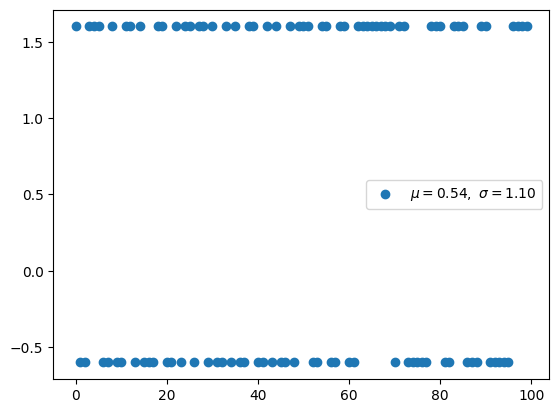

In [ ]:
import random # mengimpor library python untuk menghasilkan angka acak
import numpy as np #mengimpor library numpy yang digunakan untuk operasi numerik pada python
from matplotlib import pyplot as plt # mengimpor library pyplot dari matplotlib yang digunakan untuk visualisasi data

def bernoulli(p, k): #definisikan fungsi bernoulli dengan argumen p dan k
    return p if k else 1 - p #mengembalikan 'p' jika 'k' adalah True, dan 1 - 'p' jika 'k' adalah False

n_experiment = 100 #variabel yang menyimpan jumlah percobaan sebanyak 100 kali
p = 1.6 #probabilitas yang akan digunakan dalam distribusi bernoulli
x = np.arange(n_experiment) #array numpy yang digunakan sebagai sumbu x pada plot
y = [] #list yang akan digunakan untuk menyimpan hasil percobaan Bernoulli

for _ in range(n_experiment): #loop for yang akan melakukan percobaan Bernoulli sebanyak 'n_experiment' kali
    pick = bernoulli(p, k=bool(random.getrandbits(1))) #baris di dalam loop for yang akan memanggil fungsi bernoulli
    y.append(pick) #hasil percobaan Bernoulli ('pick') akan ditambahkan ke dalam list 'y'

u, s = np.mean(y), np.std(y) #perhitungan rata-rata (mean) dan standar deviasi dari hasil percobaan yang disimpan dalam 'y'
plt.scatter(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s)) #membuat scatter plot menggunakan Matplotlib
plt.legend() #menampilkan legenda pada plot
plt.show #menampilkan plot

## Flowchart
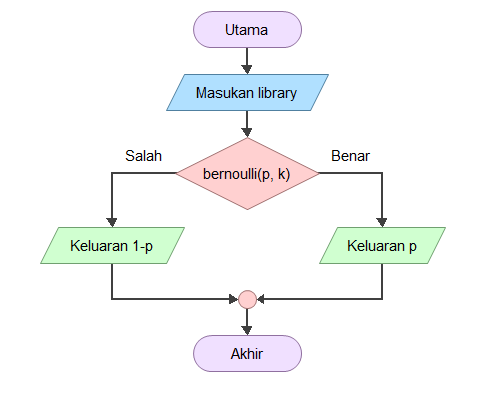


## **Distribusi Binomial**

### b1. Jika matriks diganti dengan [(0.9, 10), (0.2, 70), (0.7, 90)] bagaimana grafiknya jelaskan menggunakan markdown dibawah grafik kumpulkan file ipnyb.

<function matplotlib.pyplot.show(close=None, block=None)>

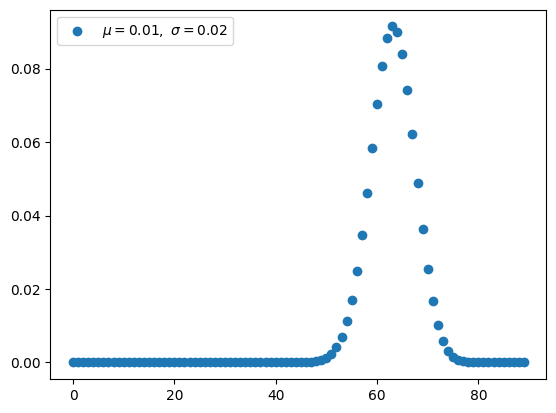

In [ ]:
import numpy as np #mengimport library numpy
from matplotlib import pyplot as plt #mengimpor pyplot dari library matplotlib
import operator as op #mengimpor modul operator yang digunakan untuk menghitung faktorial
from functools import reduce #mengimpor fungsi reduce dari modul functools
def const(n, r): #definisikan fungsi const yang akan menghitung kombinasi n dan r
    r = min(r, n-r) #menghitung nilai minimum antara r dan n-r dan memasukkannya ke r
    numer = reduce(op.mul, range(n, n-r, -1), 1) #menggunakan fungsi reduce untuk mengalikan semua bilangan bulat n hingga n-r+1 yang hasilnya disimpan dalam numer
    denom = reduce(op.mul, range(1, r+1), 1) #menggunakan fungsi reduce untuk mengalikan semua bilangan bulat dari 1 hingga r yang hasilnya disimpan dalam denom
    return numer / denom #mengembalikan nilai dari kombinasi (n choose r) yang dihitung dengan membagi numer dengan denom

def binomial(n, p): #definisikan fungsi binomial yang akan menghitung distribusi binomial dengan parameter n (jumlah eksperimen) dan p (probabilitas)
    q = 1 - p #menghitung probabilitas kegagalan (q) sebagai 1 minus probabilitas keberhasilan (p)
    y = [const(n, k) * (p ** k) * (q ** (n-k)) for k in range(n)] #menggabungkan hasil dari fungsi const dengan p dan q sesuai dengan rumus distribusi binomial
    return y, np.mean(y), np.std(y) #mengembalikan list y yang berisi probabilitas distribusi binomial, nilai rata-rata dan deviasi standar dari y

for ls in [(0.9, 10), (0.2, 70), (0.7, 90)]: #menjalankan distribusi binomial untuk tiga pasangan parameter yang berbeda
    p, n_experiment = ls[0], ls[1] #menguraikan nilai p dan n_experiment dari setiap pasangan parameter dalam loop
    x = np.arange(n_experiment) #membuat array x yang berisi nilai dari 0 hingga n_experiment-1 menggunakan NumPy
    y, u, s = binomial(n_experiment, p) #menjalankan fungsi binomial dengan parameter n_experiment dan p

plt.scatter(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s)) #membuat scatter plot menggunakan Matplotlib
plt.legend() #menambahkan legenda ke plot.
plt.show #menampilkan plot grafik

## Flowchart
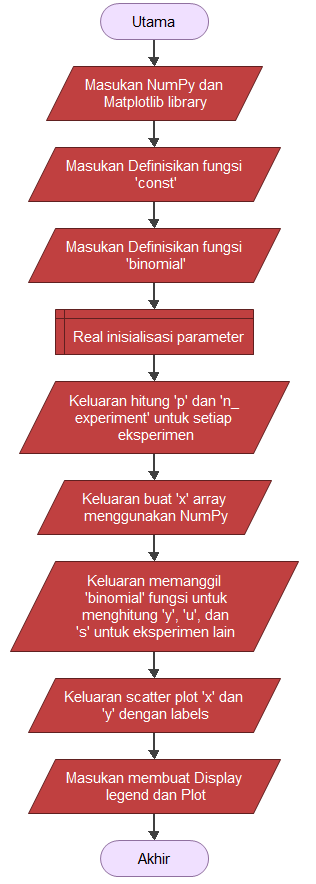

## **Distribusi Beta**

### c1. Jika nilai trial kita ubah menjadi 0,5 dan 0.1 apa yang terjadi ? jelaskan menggunakan markdown dalam file c1 dengan format dokumen ipnyb.

<ipython-input-16-cfad39e8eeff>:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.arange(0, 5, 0.1, dtype=np.float)


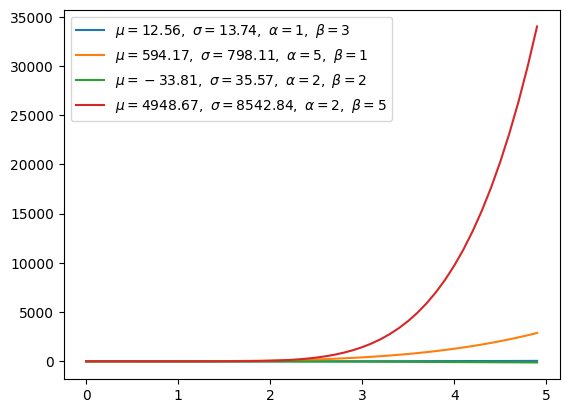

In [ ]:
import numpy as np # Mengimpor library NumPy sebagai np
from matplotlib import pyplot as plt # Mengimpor fungsi pyplot dari library Matplotlib sebagai plt

def gamma_function(n): # Fungsi gamma_function(n) digunakan untuk menghitung nilai faktorial dari n.
    cal = 1
    for i in range(2, n): # Ini mengalikan semua bilangan bulat positif dari 2 hingga n
        cal *= i
    return cal

def beta(x, a, b): #digunakan untuk menghitung distribusi Beta dengan parameter x, a, dan b.
    gamma = gamma_function(a + b) / \
        (gamma_function(a) * gamma_function(b)) # Menghitung fungsi gamma dari (a+b) dan fungsi gamma dari a dan b
    y = gamma * (x ** (a - 1)) * ((1 - x) ** (b - 1)) # Menghitung probabilitas beta
    return x, y, np.mean(y), np.std(y) # Mengembalikan nilai x, probabilitas y, nilai rata-rata (u), dan deviasi standar (s)

for ls in [(1, 3), (5, 1), (2,2), (2,5)]: # Melakukan percobaan distribusi beta untuk beberapa nilai a dan b yang berbeda
    a, b = ls[0], ls[1]

    x = np.arange(0, 5, 0.1, dtype=np.float) # Membuat array x yang berisi nilai dari 0 hingga 1 dengan langkah 0.001
    x, y, u, s = beta(x, a=a, b=b) # Memanggil fungsi beta untuk menghitung distribusi Beta
    plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f,'r'\ \alpha=%d,\ \beta=%d$' % (u, s, a, b)) # Membuat plot dari distribusi beta dengan label yang menunjukkan nilai rata-rata, deviasi standar, nilai alpha, dan beta
plt.legend() # Menampilkan legenda pada plot
plt.show() # Menampilkan plot

## Flowchart
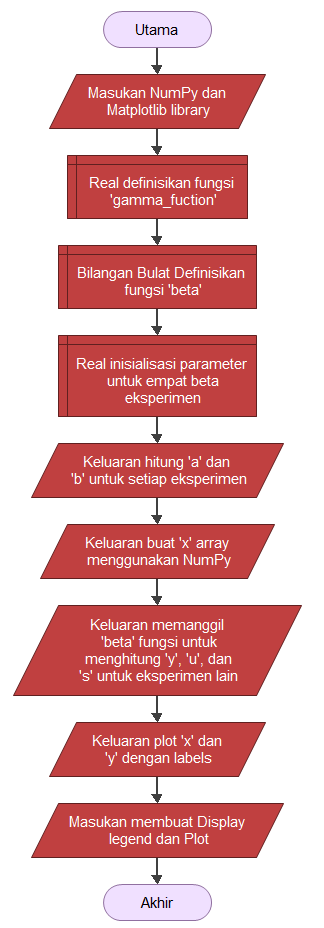

pada grafik diatas menunjukkan empat grafik plot garis yang menunjukkan distribusi Beta untuk empat pasangan nilai 'a' dan 'b' yang berbeda. Setiap plot akan memvisualisasikan distribusi Beta sesuai dengan parameter 'alpha' (a) dan 'beta' (b) yang diberikan.

## **Distribusi Multinomial**

### d1. Jika array di ubah menjadi [16, 11, 14] maka apa yang terjadi ? jelaskan menggunakan markdown dalam file c1 dengan format dokumen ipnyb.

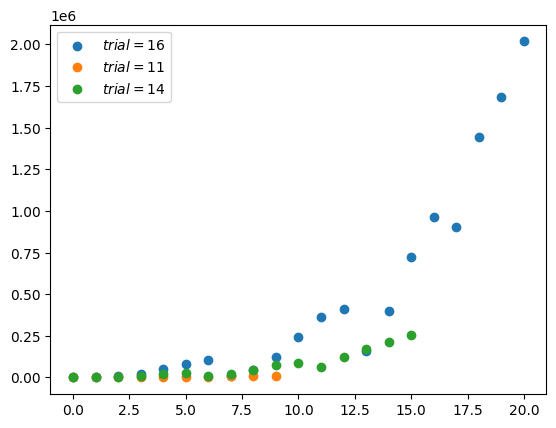

In [ ]:
import numpy as np #mengimpor library NumPy sebagai np
from matplotlib import pyplot as plt #mengimpor fungsi pyplot dari library Matplotlib sebagai plt
import operator as op #mengimpor modul operator sebagai op
from functools import reduce #mengimpor fungsi reduce dari modul functools

def factorial(n): #fungsi 'factorial' digunakan untuk menghitung faktorial dari suatu bilangan n
    return reduce(op.mul, range(1, n + 1), 1)
def const(n, a, b, c): #fungsi 'const' menghitung nilai konstanta kombinatorial dari multinomial
    assert a + b + c == n
    numer = factorial(n) #menghitung numer dan denomin dari konstanta
    denom = factorial(a) * factorial(b) * factorial(c)
    return numer/denom #mengembalikan hasil perhitungan konstanta
def multinomial(n): #fungsi 'multinomial' menghitung distribusi multinomial
    ls = []
    for i in range(1, n + 1):
        for j in range(i, n + 1):
            for k in range(j, n + 1):
                if i + j + k == n:
                    ls.append([i, j, k])

    y = [const(n, l[0], l[1], l[2]) for l in ls] #menghitung probabilitas untuk setiap kombinasi [i, j, k]
    x = np.arange(len(y))
    return x, y, np.mean(y), np.std(y)

for n_experiment in [16, 11, 14]: #melakukan percobaan distribusi multinomial untuk beberapa nilai n_experiment yang berbeda
    x, y, u, s = multinomial(n_experiment)
    plt.scatter(x, y, label=r'$trial=%d$' % (n_experiment)) #membuat scatter plot dari hasil percobaan dengan label yang menunjukkan jumlah percobaan (trial)
plt.legend() #menampilkan hasil legend
plt.show() #menampilkan plot

tiga scatter plot yang menunjukkan distribusi multinomial untuk tiga nilai 'n_experiment' yang berbeda (16, 11, 14) dengan label yang mencantumkan jumlah eksperimen.

## Flowchart
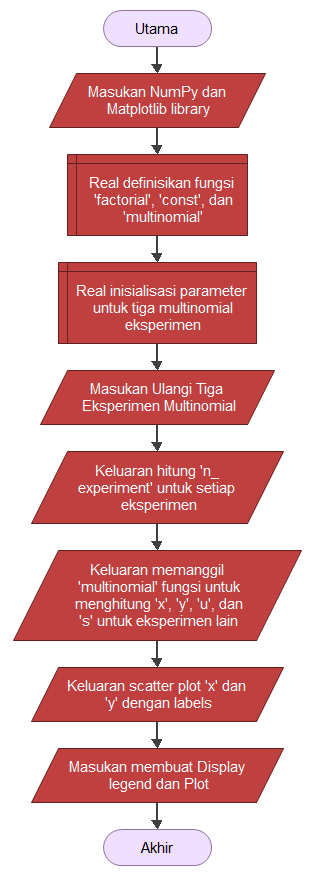

## **Distribusi Gaussian**

### e1. Buatlah jika nilai nilai gaussian bernilai 100 analisis hasilnya.
### e2. Jika define range dari x diubah apa yang akan terjadi.

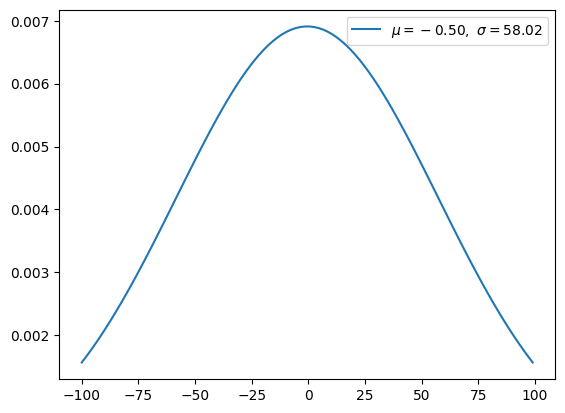

In [ ]:
import numpy as np #mengimpor library NumPy sebagai np
from matplotlib import pyplot as plt #mengimpor fungsi pyplot dari library Matplotlib sebagai plt
def gaussian(x, n): #fungsi 'gaussian' menghitung distribusi Gaussian
    u = x.mean() #menghitung nilai rata-rata (u) dari data x
    s = x.std() #menghitung nilai deviasi standar (s) dari data x
# divide [x.min(), x.max()] by n
    x = np.linspace(x.min(), x.max(), n) #membagi rentang [x.min(), x.max()] menjadi n interval
    a = ((x - u) ** 2) / (2 * (s ** 2)) #menghitung fungsi Gaussian
    y = 1 / (s * np.sqrt(2 * np.pi)) * np.exp(-a)
    return x, y, x.mean(), x.std() #mengembalikan nilai x, probabilitas y, nilai rata-rata (u), dan deviasi standar (s)

x = np.arange(-100, 100) #define range of x
x, y, u, s = gaussian(x, 100) #memanggil fungsi Gaussian untuk menghitung distribusi Gaussian
plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u,s)) #membuat plot distribusi Gaussian dengan label yang menunjukkan nilai rata-rata (μ) dan deviasi standar (σ)
plt.legend() #menambahkan legend ke plot

## Flowchart
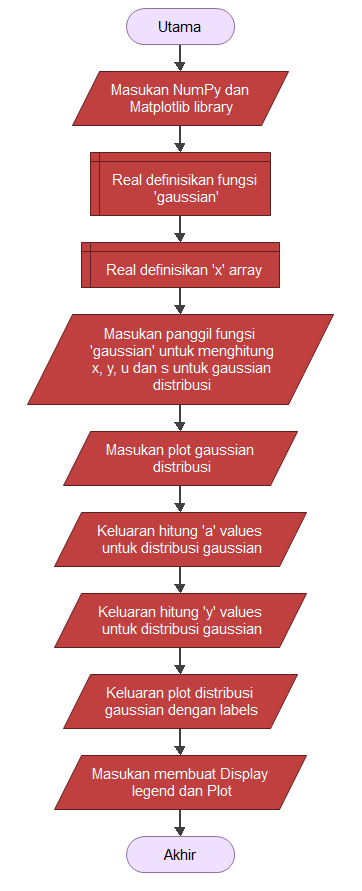

## **Maximum Likelihood**

### f1. Tampilkan keluaran dari semua model yang ada diatas.
### f2. Jelaskan alur dari code ipnyb diatas, apa saja yang dapat dianalisis dari hasil output diatas.

In [2]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

#Masukan data dengan kode dibawah ini
data = sm.datasets.spector.load_pandas()
exog = data.exog
endog = data.endog
print(sm.datasets.spector.NOTE)
print(data.exog.head())

#Mereka, kami menambahkan kostanta ke matriks regresi
exog = sm.add_constant(exog, prepend=True) #menabahkan konstanta ke variabel exog:

#Untuk membuat model kemungkinan anda sendiri, anda hanya perlu menimpa metode likelohood
class MyProbit(GenericLikelihoodModel): #Mendefinisikan kelas MyProbit sebagai turunan dari GenericLikelihoodModel
  def loglike(self, params):
    exog= self.exog
    endog= self.endog
    q=2 * endog -1
    return stats.norm.logcdf(q*np.dot(exog, params)).sum() # lalu menghitung log-likelihood model probit berdasarkan variabel exog dan endog.

#Perkirakan modelnya dan cetak ringkasannya :
sm_probit_manual = MyProbit(endog, exog).fit() #membuat instance dari kelas MyProbit dengan data endog dan exog, lalu melakukan fitting model
print(sm_probit_manual.summary()) #mencetak ringkasan statistik dari hasil fitting model probit yang dilakukan secara manual.

#compure your probit implementation to statmodels' "canned" implementation:
sm_probit_canned = sm.Probit(endog, exog).fit() #membuat instance lain dari kelas MyProbit dengan data endog dan exog, lalu melakukan fitting

#mencetak parameter-parameter model probit yang dihasilkan oleh fitting model probit.
print(sm_probit_canned.params)
print(sm_probit_manual.params)

#mencetak matriks kovarian parameter model probit yang digunakan untuk menghitung sebaran kesalahan (standard error) dari parameter-parameter
print(sm_probit_canned.cov_params())
print(sm_probit_manual.cov_params())

::

    Number of Observations - 32

    Number of Variables - 4

    Variable name definitions::

        Grade - binary variable indicating whether or not a student's grade
                improved.  1 indicates an improvement.
        TUCE  - Test score on economics test
        PSI   - participation in program
        GPA   - Student's grade point average

    GPA  TUCE  PSI
0  2.66  20.0  0.0
1  2.89  22.0  0.0
2  3.28  24.0  0.0
3  2.92  12.0  0.0
4  4.00  21.0  0.0
Optimization terminated successfully.
         Current function value: 0.400588
         Iterations: 292
         Function evaluations: 494
                               MyProbit Results                               
Dep. Variable:                  GRADE   Log-Likelihood:                -12.819
Model:                       MyProbit   AIC:                             33.64
Method:            Maximum Likelihood   BIC:                             39.50
Date:                Fri, 22 Sep 2023                              

## Flowchart
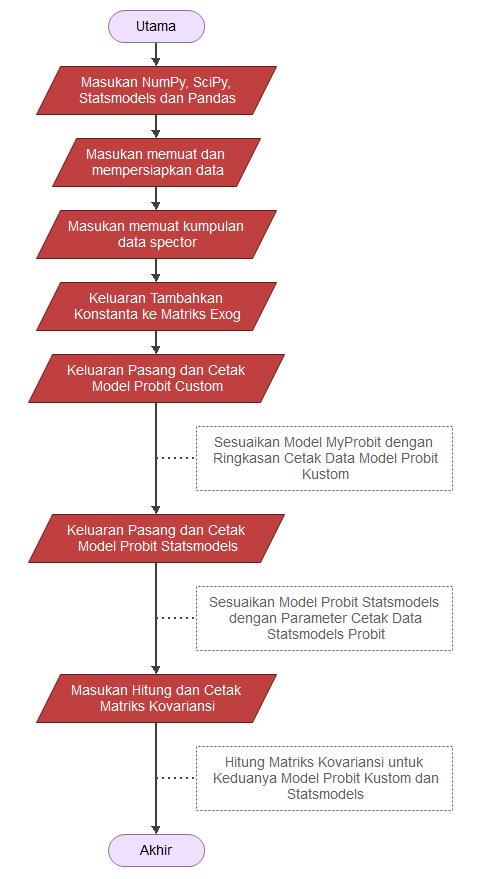